<a href="https://colab.research.google.com/github/pkhamchuai/LSTM-Lottery-Prediction/blob/main/Lottery_Dropout0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data processing

In [2]:
def get_month_TH(s):
  month_name = ['มกราคม', 'กุมภาพันธ์', 'มีนาคม', 'เมษายน', 'พฤษภาคม', 'มิถุนายน', \
                'กรกฎาคม', 'สิงหาคม', 'กันยายน', 'ตุลาคม', 'พฤศจิกายน', 'ธันวาคม']
  month_name.index(s)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# change this to your file path, i.e. just 'Lottery.xlsx'
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Lottery/Lottery.xlsx', header=None) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I need to read lottery history data from an excel file which I manually copied data into previously because getting data from the website isn't working anymore (at least for the way I found, because the URL and website name are too long).

The data is from [this website](https://www.myhora.com/%E0%B8%AB%E0%B8%A7%E0%B8%A2/%E0%B8%AA%E0%B8%96%E0%B8%B4%E0%B8%95%E0%B8%B4%E0%B8%AB%E0%B8%A7%E0%B8%A2-%E0%B8%A2%E0%B9%89%E0%B8%AD%E0%B8%99%E0%B8%AB%E0%B8%A5%E0%B8%B1%E0%B8%87-20-%E0%B8%9B%E0%B8%B5.aspx?mode=year-range&value=20).

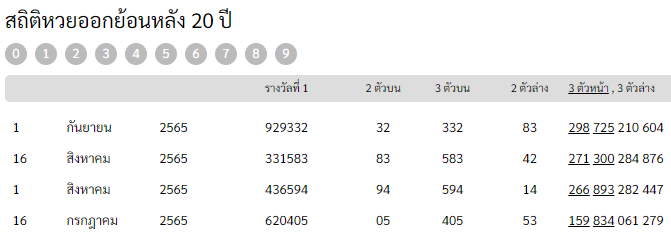

In [4]:
df.head()

,0
0,1กันยายน25659293323233283298 725 210 604
1,16สิงหาคม25653315838358342271 300 284 876
2,1สิงหาคม25654365949459414266 893 282 447
3,16กรกฎาคม25656204050540553159 834 061 279
4,1กรกฎาคม25659814171741761242 287 002 542


In [5]:
# numbers of data entries
df.shape

(480, 1)

## Data index in the string

In [6]:
df[0][0]

'1กันยายน25659293323233283298 725 210 604'

In [7]:
# เลขท้าย 3 ตัวหน้า/ล่าง
df[0][0][-15:].split()

['298', '725', '210', '604']

In [8]:
# 2 ตัวล่าง
df[0][0][-17:-15]

'83'

In [9]:
# 3 ตัวบน
df[0][0][-20:-17]

'332'

In [10]:
# 2 ตัวบน
df[0][0][-22:-20]

'32'

In [11]:
# รางวัลที่ 1
df[0][0][-28:-22]

'929332'

In [12]:
# ปี
df[0][0][-32:-28]

'2565'

In [13]:
import re
# วันที่
re.findall(r'(\d+)', df[0][0])[0]

'1'

## Getting data from the string

In [14]:
# Month
month_name = ['มกราคม', 'กุมภาพันธ์', 'มีนาคม', 'เมษายน', 'พฤษภาคม', 'มิถุนายน', \
                'กรกฎาคม', 'สิงหาคม', 'กันยายน', 'ตุลาคม', 'พฤศจิกายน', 'ธันวาคม']
def get_month_TH(s):
  for i in range(len(month_name)):
    if month_name[i] in s:
      return i+1
    else:
        pass

def get_data(s):
  # วันที่
  s1 = int(re.findall(r'(\d+)', s)[0])

  # เดือน ดึงข้อมูลออกมาเป็นหมายเลขของเดือนแทนที่จะเป็นชื่อเดือน
  s2 = get_month_TH(s)

  # ปี
  s3 = int(s[-32:-28])

  # รางวัลที่ 1
  s4 = int(s[-28:-22])

  # 2 ตัวบน
  s5 = int(s[-22:-20])

  # 3 ตัวบน
  s6 = int(s[-20:-17])

  # 2 ตัวล่าง
  s7 = int(s[-17:-15])

  # เลขท้าย 3 ตัวหน้า/ล่าง
  s8 = list(map(int, s[-15:].split()))

  return [s1, s2, s3, s4, s5, s6, s7, s8[0], s8[1], s8[2], s8[3]]

In [15]:
print(get_data(df[0][0]))

[1, 9, 2565, 929332, 32, 332, 83, 298, 725, 210, 604]


In [16]:
# data = [get_data(row) for row in df[0]]

# Let's check the data first

In [17]:
data = pd.DataFrame([get_data(row) for row in df[0]])

In [18]:
data.columns = ['date', 'month', 'year', 'รางวัลที่1', '2ตัวบน', '3ตัวบน', '2ตัวล่าง', \
               '3ตัวหน้า_1', '3ตัวหน้า_2', '3ตัวหลัง_1', '3ตัวหลัง_2']

In [19]:
data.head()

,date,month,year,รางวัลที่1,2ตัวบน,3ตัวบน,2ตัวล่าง,3ตัวหน้า_1,3ตัวหน้า_2,3ตัวหลัง_1,3ตัวหลัง_2
0,1,9,2565,929332,32,332,83,298,725,210,604
1,16,8,2565,331583,83,583,42,271,300,284,876
2,1,8,2565,436594,94,594,14,266,893,282,447
3,16,7,2565,620405,5,405,53,159,834,61,279
4,1,7,2565,981417,17,417,61,242,287,2,542


In [20]:
data.shape

(480, 11)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   date        480 non-null    int64
 1   month       480 non-null    int64
 2   year        480 non-null    int64
 3   รางวัลที่1  480 non-null    int64
 4   2ตัวบน      480 non-null    int64
 5   3ตัวบน      480 non-null    int64
 6   2ตัวล่าง    480 non-null    int64
 7   3ตัวหน้า_1  480 non-null    int64
 8   3ตัวหน้า_2  480 non-null    int64
 9   3ตัวหลัง_1  480 non-null    int64
 10  3ตัวหลัง_2  480 non-null    int64
dtypes: int64(11)
memory usage: 41.4 KB


In [22]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date,480.0,9.741667,8.451997,1.0,1.00,16.0,16.00,30.0
month,480.0,6.981250,3.421909,1.0,4.00,7.0,10.00,12.0
year,480.0,2555.054167,5.813129,2545.0,2550.00,2555.0,2560.00,2565.0
รางวัลที่1,480.0,494114.275000,295167.009295,816.0,227619.75,480125.5,759140.50,999997.0
2ตัวบน,480.0,48.025000,28.689094,0.0,23.00,49.0,72.00,98.0
3ตัวบน,480.0,505.941667,280.934076,2.0,295.00,499.0,750.25,997.0
2ตัวล่าง,480.0,51.722917,29.321561,0.0,26.00,53.0,79.00,99.0
3ตัวหน้า_1,480.0,408.410417,273.168879,1.0,178.25,350.5,616.00,993.0
3ตัวหน้า_2,480.0,523.912500,290.032294,1.0,281.50,531.0,780.25,999.0
3ตัวหลัง_1,480.0,454.141667,280.016106,1.0,199.75,447.5,686.00,999.0


In [23]:
import plotly.graph_objects as go
import plotly.express as px

In [24]:
fig = px.histogram(x=data['รางวัลที่1'], nbins=1000)
fig.show()

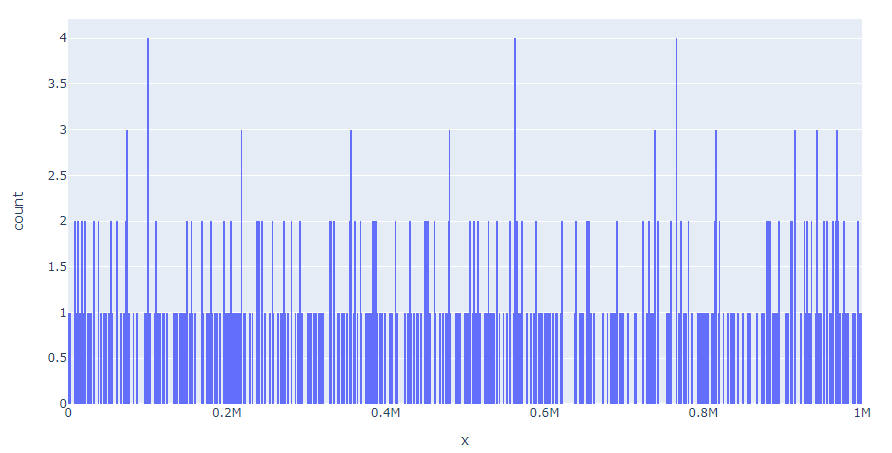

In [25]:
fig = px.histogram(x=data['2ตัวบน'], nbins=100)
fig.show()

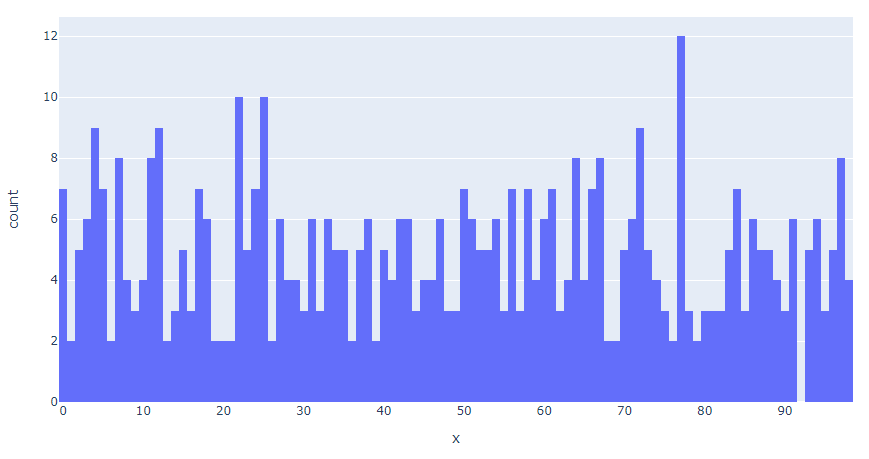

In [26]:
fig = px.histogram(x=data['3ตัวบน'], nbins=1000)
fig.show()

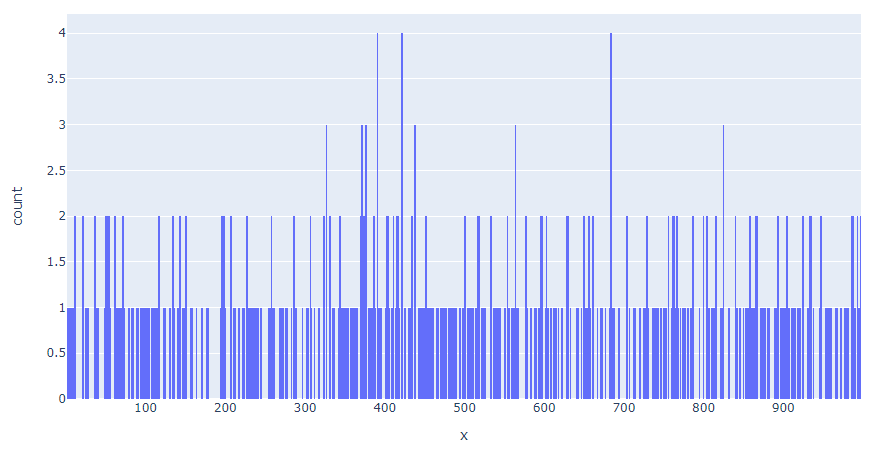

In [27]:
fig = px.histogram(x=data['2ตัวล่าง'], nbins=100)
fig.show()

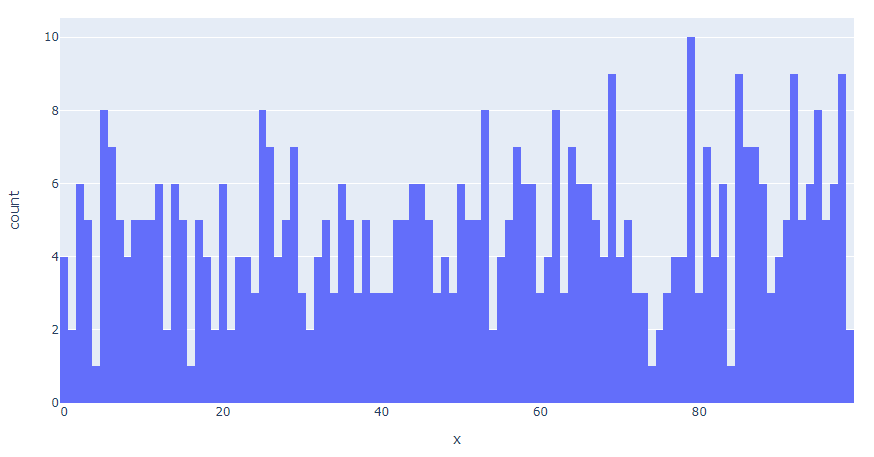

In [28]:
fig = px.histogram(x=pd.concat([data['3ตัวหน้า_1'], data['3ตัวหน้า_2'], data['3ตัวหลัง_1'], data['3ตัวหลัง_2']], axis=0), nbins=1000)
fig.show()

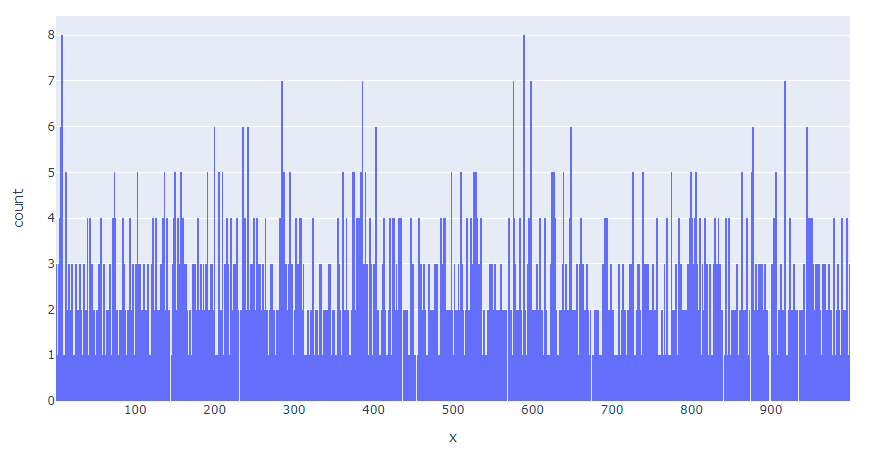

# Training prediction of เลขท้าย 3 ตัว 4 เลข

At this point, we have to think about how we'll train the model, which type of result we want to get, either only 6, 3, or 2 digits of the prizes as a whole, or result per digit.

As for start, I'll predict 4 numbers of เลขท้าย 3 ตัว first.

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [30]:
data3digits = data[['3ตัวหน้า_1', '3ตัวหน้า_2', '3ตัวหลัง_1', '3ตัวหลัง_2']]

In [31]:
# reverse the data
data3digits = data3digits.iloc[::-1]

In [32]:
scaler = StandardScaler().fit(data3digits.values)
transformed_dataset = scaler.transform(data3digits.values)
transformed_df = pd.DataFrame(data=transformed_dataset, index=data3digits.index)

In [33]:
number_of_rows = data3digits.values.shape[0] # จำนวนงวดทั้งหมด = 480
window_length = 7
number_of_features = data3digits.values.shape[1] # จำนวนเลขท้าย 3 ตัวที่ต้องการ = 4

Create a dataset and label for each row, in format of Keras' LSTM model (rows, windows size, number of prize).

In [34]:
offset = 1 # we need to spare some data for testing
train = np.empty([number_of_rows-window_length-offset, window_length, number_of_features], dtype=float)
label = np.empty([number_of_rows-window_length-offset, number_of_features], dtype=float)

for i in range(0, number_of_rows-window_length-offset):
  train[i] = transformed_df.iloc[i:i+window_length, 0: number_of_features]
  label[i] = transformed_df.iloc[i+window_length: i+window_length+1, 0: number_of_features]

In [35]:
print(train.shape)
print(label.shape)

(472, 7, 4)
(472, 4)


In [36]:
test_features = np.empty([1, window_length, number_of_features], dtype=float)
test_features[0] = transformed_df.iloc[number_of_rows-window_length-offset:-1, 0: number_of_features]
#label[i] = transformed_df.iloc[window_length+1, 0: number_of_features]

test_label = np.empty([1, number_of_features], dtype=float)
test_label[0] = transformed_df.iloc[-1] # The last row = newest actual lottery results

In [37]:
test_features[0]

array([[-0.59149789,  0.73201769, -0.77984533, -0.12426769],
       [ 0.99159132,  1.01158831, -0.86206916,  0.27959103],
       [-0.45224467,  0.08658923, -1.2445887 , -1.24930267],
       [-0.60982068, -0.81770091, -1.6163834 , -0.11705592],
       [-0.91397903,  1.07026362, -1.40546141, -1.06540272],
       [-0.52187128,  1.27390148, -0.61539768, -0.45961465],
       [-0.50354849, -0.77283155, -0.60824778,  1.08730845]])

In [38]:
test_label

array([[-0.40460542,  0.69405131, -0.87279401,  0.10650872]])

## LSTM model

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout
batch_size = 100

In [40]:
model = Sequential()
model.add(Bidirectional(LSTM(240, input_shape=(window_length, number_of_features),
                             return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(240, input_shape=(window_length, number_of_features),
                             return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(240, input_shape=(window_length, number_of_features),
                             return_sequences=True)))
model.add(Bidirectional(LSTM(240, input_shape=(window_length, number_of_features),
                             return_sequences=False)))
model.add(Dense(59))
model.add(Dense(number_of_features))

model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

## Training

In [41]:
history = model.fit(train, label, batch_size=100, verbose=0, epochs=100)

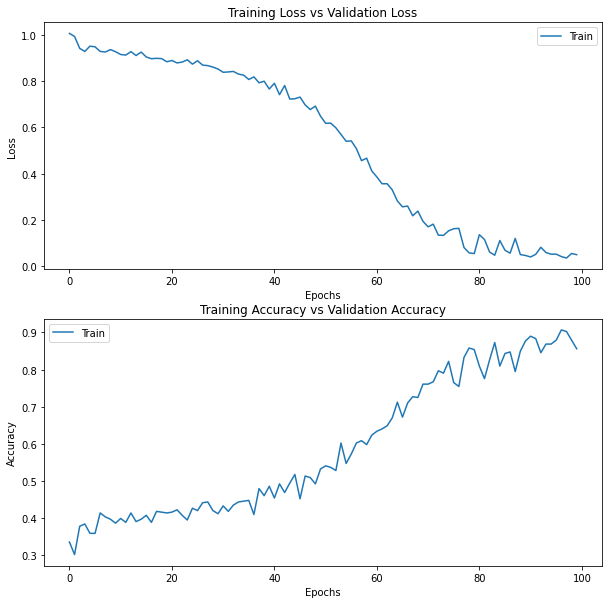

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].plot(history.history['loss'])
#axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
#axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

## Prediction

In [46]:
scaled_predicted_output = model.predict(test_features)
print(scaler.inverse_transform(scaled_predicted_output).astype(int)[0])

[145 589 312 827]


In [44]:
# actual results
print(scaler.inverse_transform(test_label).astype(int))

[[298 725 210 604]]


In [45]:
# actual results
data3digits.iloc[-1,:]

3ตัวหน้า_1    298
3ตัวหน้า_2    725
3ตัวหลัง_1    210
3ตัวหลัง_2    604
Name: 0, dtype: int64